### EDA

In [35]:

# Librerias básicas
import pandas as pd
import numpy as np

# Librerias de Visualización 
import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
plt.style.use("seaborn")

#sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor



C:\Users\psych\AppData\Local\Temp\ipykernel_22188\1522235416.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [36]:
#data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Con el .info vemos que tipo de datos tenemos. 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [38]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Remplazamos los datos que son únicos en dos, que son True y False (Booleanos), para que sean no y si

In [39]:
df['Transported'].replace(False,'No',inplace=True)
df['Transported'].replace(True,'Si',inplace=True)

df['CryoSleep'].replace(False,'No',inplace=True)
df['CryoSleep'].replace(True,'Si',inplace=True)

df['VIP'].replace(False,'No',inplace=True)
df['VIP'].replace(True,'Si',inplace=True)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,No
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Si
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Si,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,No
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,No
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Si


Vemos cuando son NaN y graficamos para ver cuanto peso tienen dentro del dataset

In [40]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

c:\Users\psych\OneDrive\Escritorio\IAF5\proyectos\proyecto_ST\ST\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


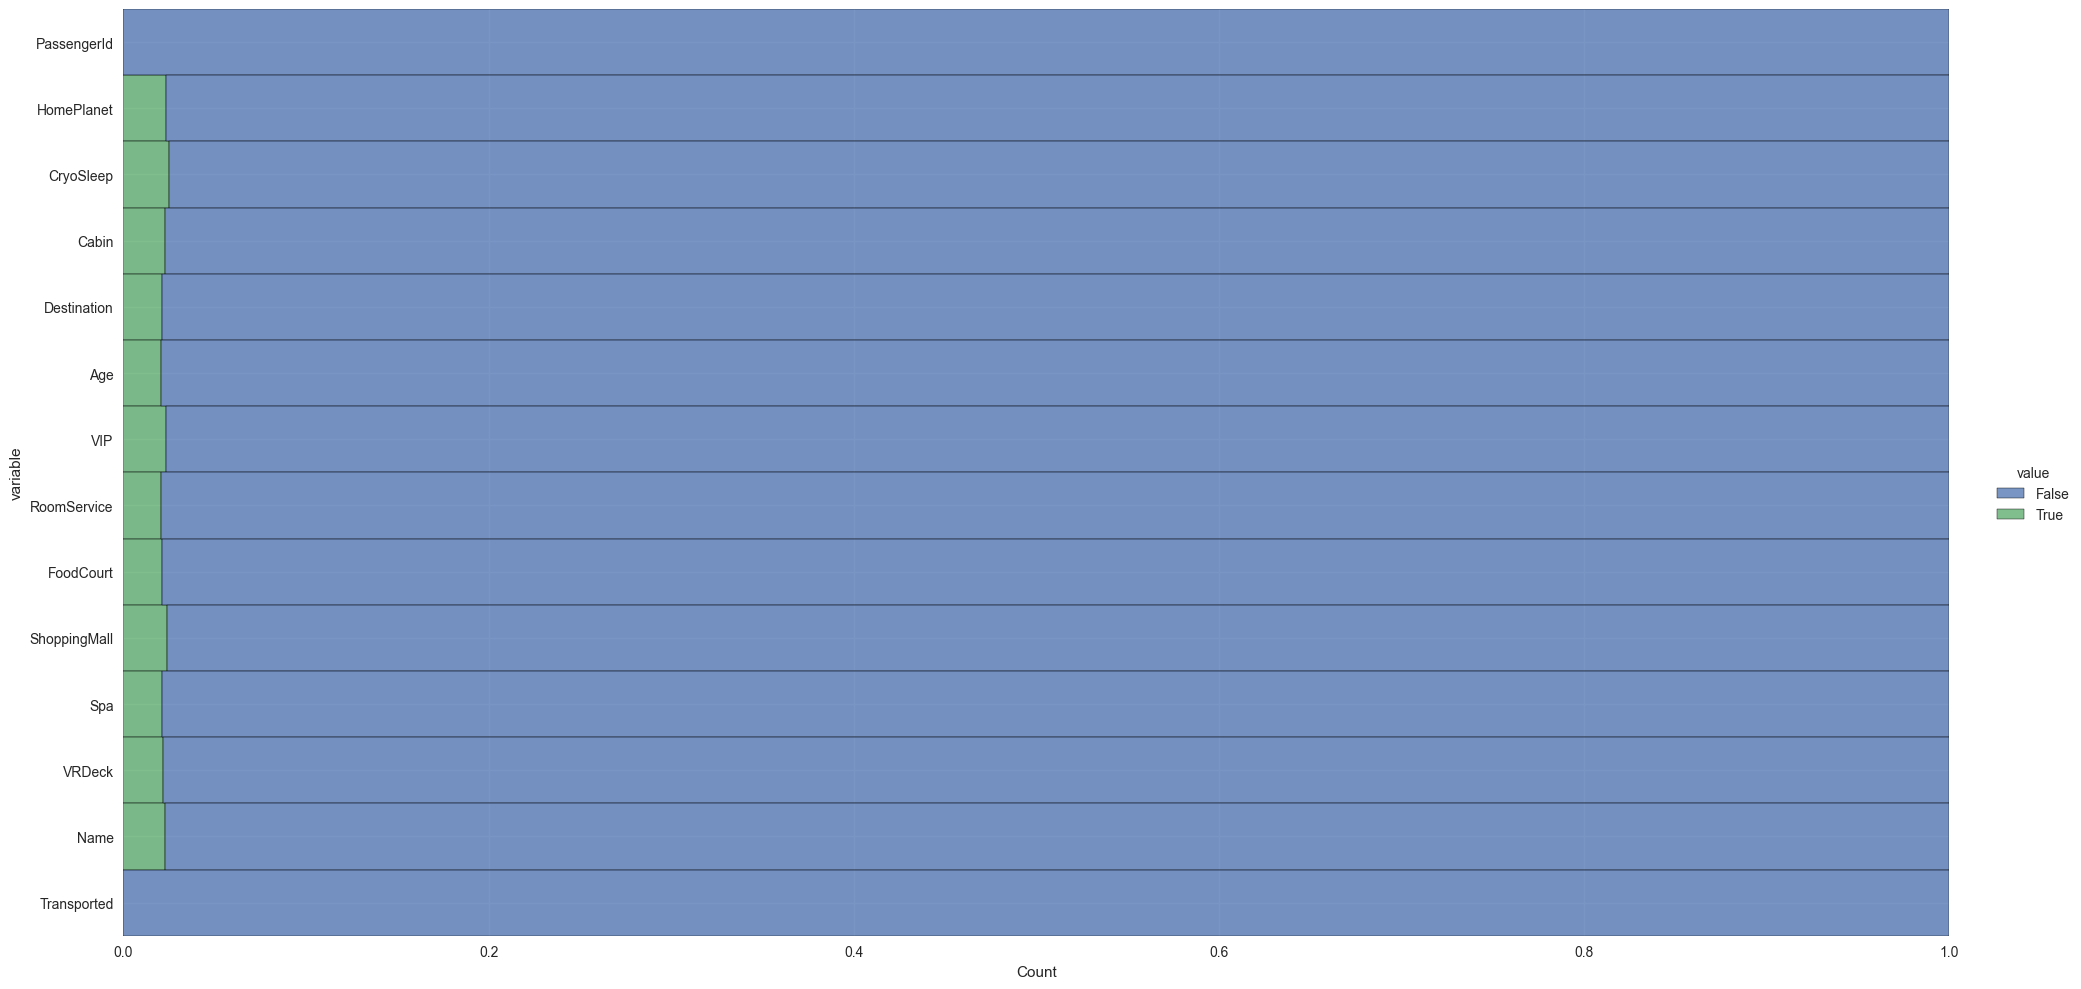

In [41]:
df.isnull().melt().pipe(lambda df:(sns.displot(data=df, y="variable", hue="value", multiple="fill", height=10, aspect=2)))


Calculamos cuanto porcentaje de NaN tenemos sobre el dataset

In [42]:
np.round(100*df.isna().sum()/len(df), 2)

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

Contamos los resultamos de las columnas que más nos interesan dentro del data set, ya que el porcentaje de NaN no es muy alto (aprox. un 2%) Más tarde rellenaremos utilizando Moda y así dejarlos a cero.

In [43]:
df[['Destination','HomePlanet', 'Transported', 'CryoSleep', 'VIP']].value_counts()

Destination    HomePlanet  Transported  CryoSleep  VIP
TRAPPIST-1e    Earth       No           No         No     1502
                           Si           No         No      661
               Mars        No           No         No      587
                           Si           Si         No      492
               Earth       Si           Si         No      487
               Europa      Si           Si         No      421
55 Cancri e    Europa      Si           Si         No      418
TRAPPIST-1e    Europa      No           No         No      384
               Earth       No           Si         No      300
55 Cancri e    Earth       No           No         No      281
TRAPPIST-1e    Europa      Si           No         No      263
PSO J318.5-22  Earth       Si           Si         No      235
                           No           No         No      227
55 Cancri e    Europa      No           No         No      223
TRAPPIST-1e    Mars        Si           No         No      216


Graficamos la columna destino, para ver si hay algún tipo de relación entre el destino y si han sido transportadas. 
Observamos que si su destino ha sido 55 Craci y PSO tienen mayor probabilidad de ser transportados.

Text(0.5, 1.0, 'Personas por destino y transportadas')

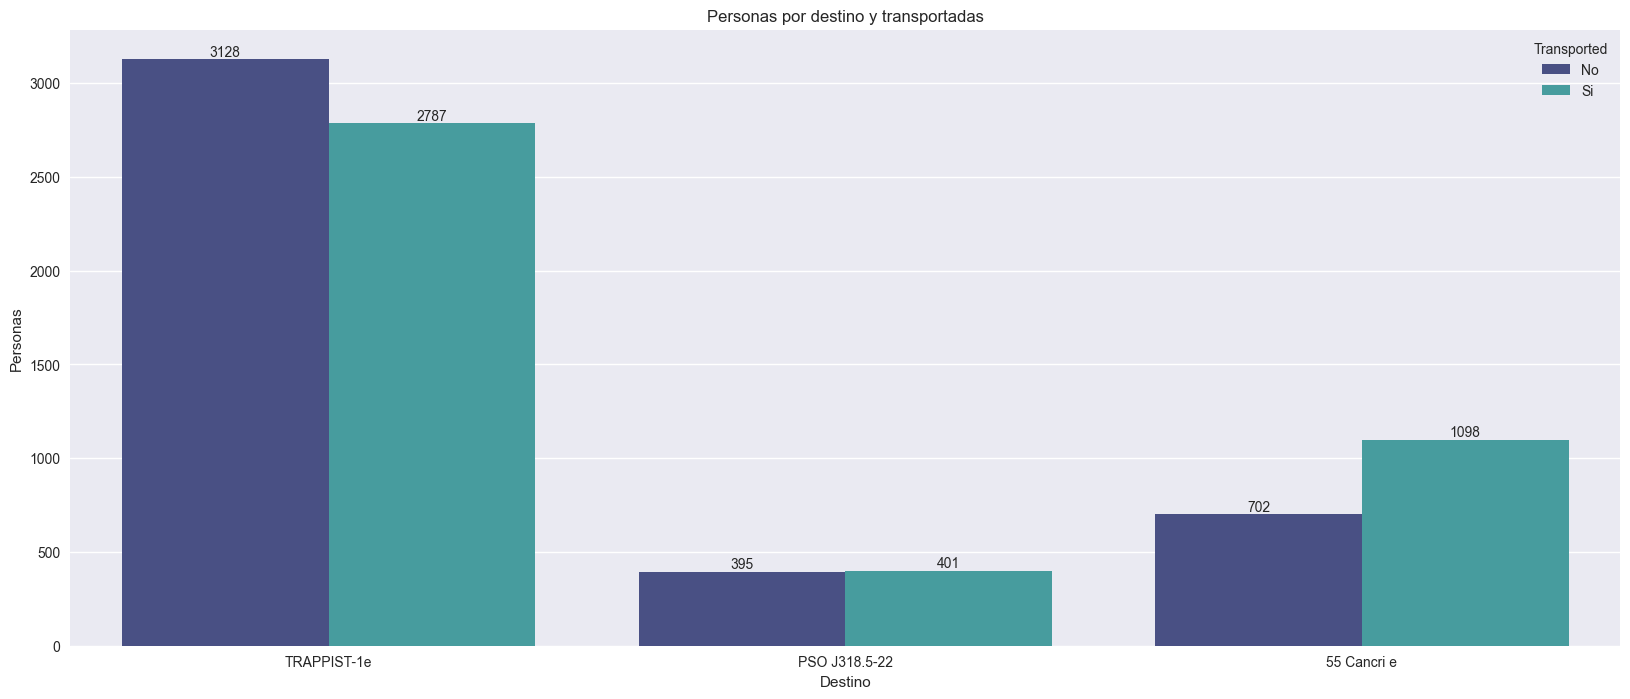

In [44]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(data=df,x='Destination', hue= 'Transported',palette='mako')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, int(height), ha='center', va='bottom')
    
plt.xlabel('Destino')
plt.ylabel('Personas')
plt.title('Personas por destino y transportadas')

Separamos el área, de la habitación y de la posición de las cabinas, para ver si influye el área o el lado para tener más probabilidad de ser transportado

In [45]:
df[['Area', 'Num', 'Lado']]=df['Cabin'].str.split('/',expand=True)
df.drop('Cabin',axis=1,inplace=True)

In [46]:
df[['Area']].value_counts()

Area
F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
T          5
Name: count, dtype: int64

Text(0.5, 1.0, 'Personas por area y transportadas')

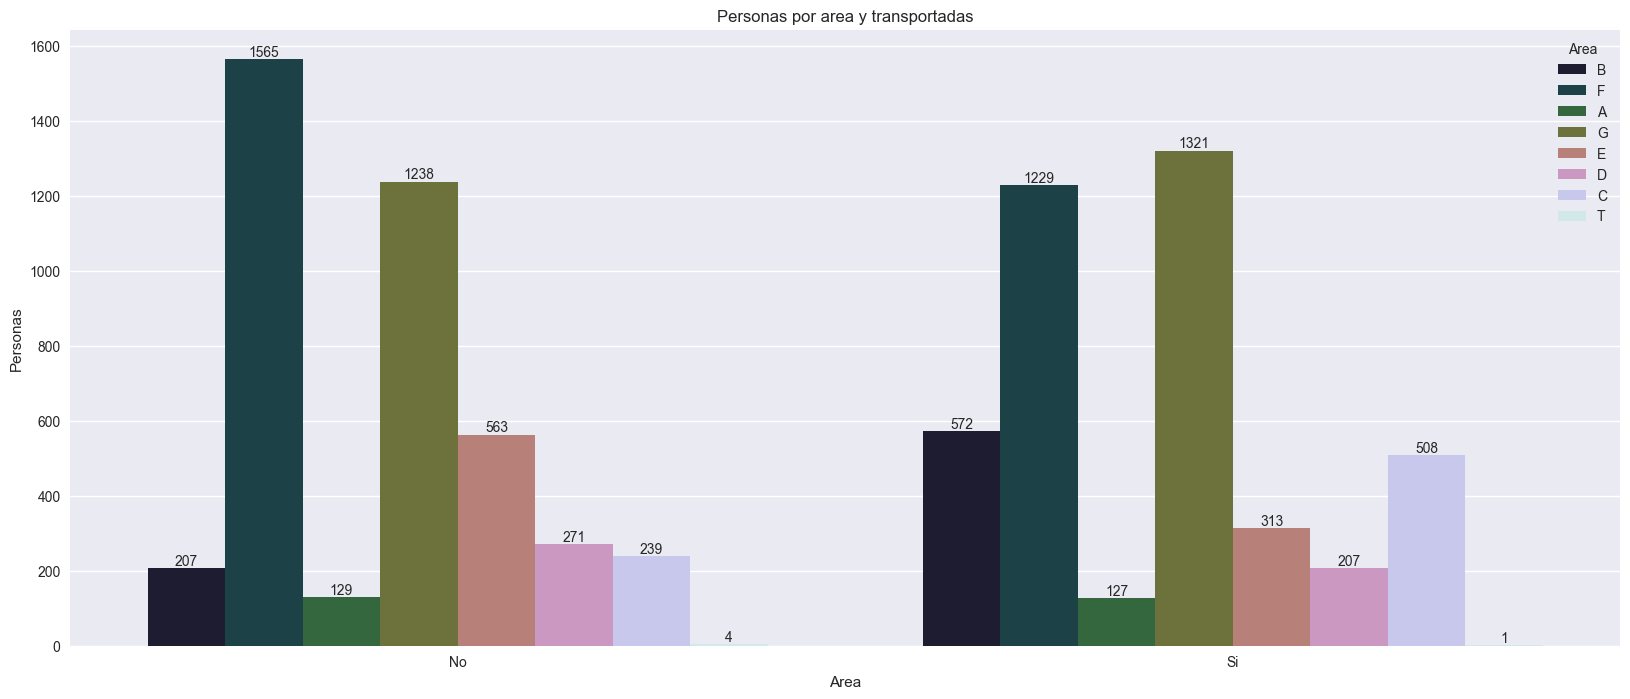

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(data=df,x='Transported', hue= 'Area',palette='cubehelix')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, int(height), ha='center', va='bottom')
    
plt.xlabel('Area')
plt.ylabel('Personas')
plt.title('Personas por area y transportadas')

Observamos que el area B, G y C tiene más personas transportadas que el resto de areas. Cabe destacar la diferencia en el area T

Text(0.5, 1.0, 'Personas por Lado y transportadas')

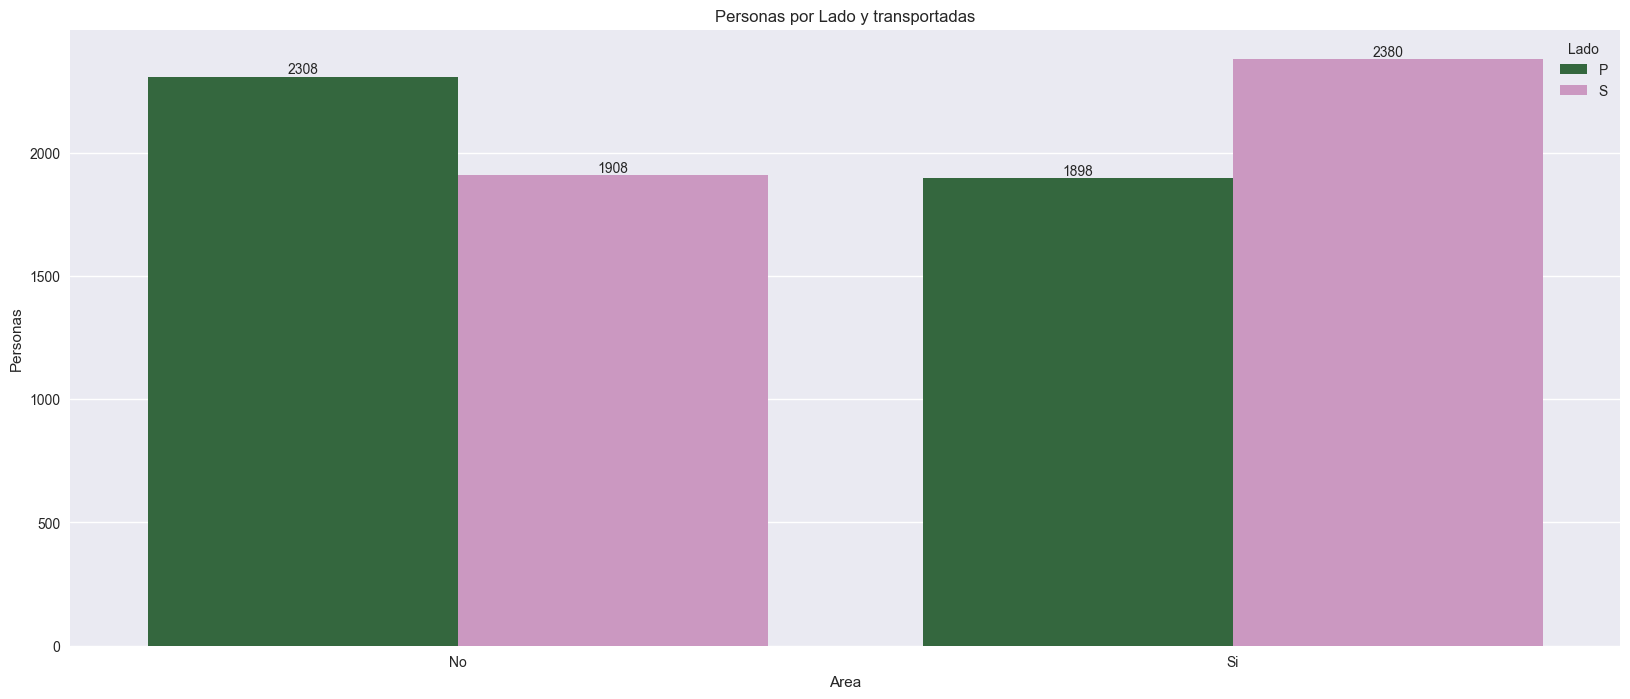

In [48]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.countplot(data=df,x='Transported', hue= 'Lado',palette='cubehelix')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, int(height), ha='center', va='bottom')
    
plt.xlabel('Area')
plt.ylabel('Personas')
plt.title('Personas por Lado y transportadas')

Observamos que el lado S tiene más probabilidad de ser transportado. 

Analizamos también la columna de CryoSleep para ver el porcentaje dependiendo el destino.

In [49]:
def percent(x, y, z):
    cot = x[y].value_counts()
    q = x.groupby([y, z])[z].count()
    t = []
    for i in cot.index:
        t.append([i,round(q[i]*100/cot[i], 2)])
    return t

percent(df, 'Destination', 'CryoSleep')

[['TRAPPIST-1e',
  CryoSleep
  No    65.90
  Si    31.56
  Name: CryoSleep, dtype: float64],
 ['55 Cancri e',
  CryoSleep
  No    56.50
  Si    41.06
  Name: CryoSleep, dtype: float64],
 ['PSO J318.5-22',
  CryoSleep
  No    49.50
  Si    48.12
  Name: CryoSleep, dtype: float64]]

In [50]:
Destination_nan_no=df[(df.Destination.isna())&(df.VIP== 'No')]
Destination_nan_yes=df[(df.Destination.isna())&(df.VIP== 'Yes')]
print('VIP = No:',Destination_nan_no.shape[0],'\n','VIP = Yes:',Destination_nan_yes.shape[0])

VIP = No: 176 
 VIP = Yes: 0


In [51]:
df.groupby(['HomePlanet','CryoSleep']).agg({'CryoSleep':'count'})

CryoSleep
HomePlanet CryoSleep           
Earth      No              3106
           Si              1382
Europa     No              1162
           Si               911
Mars       No              1047
           Si               669

In [52]:
def percent(x, y, z):
    cot = x[y].value_counts()
    q = x.groupby([y, z])[z].count()
    t = []
    for i in cot.index:
        t.append([i,round(q[i]*100/cot[i], 2)])
    return t

percent(df, 'HomePlanet', 'CryoSleep')

[['Earth',
  CryoSleep
  No    67.49
  Si    30.03
  Name: CryoSleep, dtype: float64],
 ['Europa',
  CryoSleep
  No    54.53
  Si    42.75
  Name: CryoSleep, dtype: float64],
 ['Mars',
  CryoSleep
  No    59.52
  Si    38.03
  Name: CryoSleep, dtype: float64]]

c:\Users\psych\OneDrive\Escritorio\IAF5\proyectos\proyecto_ST\ST\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


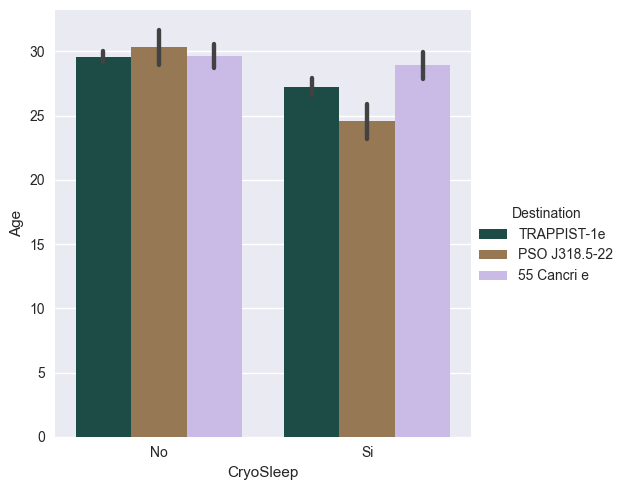

In [53]:
sns.catplot(data=df, x="CryoSleep", y="Age", hue="Destination", kind="bar", palette='cubehelix')

Text(0.5, 1.0, 'Distribucion por destino y lugar')

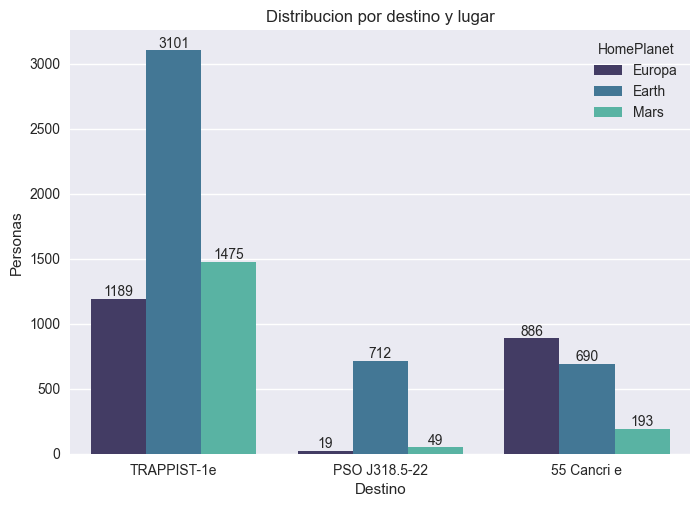

In [54]:
ax = sns.countplot(data=df,x='Destination',hue = 'HomePlanet', palette='mako')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, int(height), ha='center', va='bottom')
plt.xlabel('Destino')
plt.ylabel('Personas')
plt.title('Distribucion por destino y lugar')

In [55]:
percent(df,'HomePlanet','Destination')

[['Earth',
  Destination
  55 Cancri e      14.99
  PSO J318.5-22    15.47
  TRAPPIST-1e      67.38
  Name: Destination, dtype: float64],
 ['Europa',
  Destination
  55 Cancri e      41.58
  PSO J318.5-22     0.89
  TRAPPIST-1e      55.80
  Name: Destination, dtype: float64],
 ['Mars',
  Destination
  55 Cancri e      10.97
  PSO J318.5-22     2.79
  TRAPPIST-1e      83.85
  Name: Destination, dtype: float64]]

In [56]:
df_clean = df[['HomePlanet','CryoSleep','Area', 'Num','Lado','Destination','Age','VIP','Transported']]
df_clean

,HomePlanet,CryoSleep,Area,Num,Lado,Destination,Age,VIP,Transported
0,Europa,No,B,0,P,TRAPPIST-1e,39.0,No,No
1,Earth,No,F,0,S,TRAPPIST-1e,24.0,No,Si
2,Europa,No,A,0,S,TRAPPIST-1e,58.0,Si,No
3,Europa,No,A,0,S,TRAPPIST-1e,33.0,No,No
4,Earth,No,F,1,S,TRAPPIST-1e,16.0,No,Si
...,...,...,...,...,...,...,...,...,...
8688,Europa,No,A,98,P,55 Cancri e,41.0,Si,No
8689,Earth,Si,G,1499,S,PSO J318.5-22,18.0,No,No
8690,Earth,No,G,1500,S,TRAPPIST-1e,26.0,No,Si
8691,Europa,No,E,608,S,55 Cancri e,32.0,No,No


In [57]:
X = df_test.drop('Cabin',axis=1)
y = df_test['HomePlanet']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= df_clean, test_size=df_test, random_state=42)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez  
...           ...        ...           ...     ...     ...               ...  
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley  

[4277 rows x 13 columns] instead.